https://www.sciencedirect.com/science/article/pii/S2352711023000705

https://enino84.github.io/courses/intro_data_assimilation/

# Final Assignment: Data Assimilation Toolbox

## Introduction

This notebook aggregates key concepts and methodologies in data assimilation discussed throughout the course. It acts as a comprehensive toolbox, elucidating theoretical foundations, mathematical expressions, and their application to novel scenarios within data assimilation.

## Module 1: Linear Algebra

### Overview
Linear algebra forms the foundation for understanding data assimilation techniques, offering tools to manipulate and interpret multidimensional data structures.

### Theoretical Background
- Discuss the significance of vectors, matrices, and their operations in data assimilation.
- Introduce eigenvalues, eigenvectors, and their importance in understanding system dynamics.

### Mathematical Formulations
- Present fundamental operations such as matrix multiplication, inversion, and the calculation of eigenvalues and eigenvectors.
  
### Example Problem
Outline a problem demonstrating the application of linear algebra in transforming observation vectors or system states in data assimilation.

In [8]:
import numpy as np

## Module 2: Statistics

### Overview
Statistics underpin the probabilistic aspects of data assimilation, enabling the quantification of uncertainty and error.

### Theoretical Background
- Define key statistical concepts like mean, variance, covariance, and their roles in data assimilation.
- Explain how probability distributions, particularly Gaussian distributions, are utilized in data assimilation contexts.

### Mathematical Formulations
- Detail the formulations for mean, variance, and covariance in the context of observational and model errors.

### Example Problem
Describe a scenario illustrating how statistical analysis can inform the assessment and treatment of uncertainties in data assimilation systems.

## Module 3: Bayes' Theorem

### Overview
Bayes' theorem is pivotal in updating the probability estimates for a system's state based on new observational data.

### Theoretical Background
- Elucidate the theorem's role in transitioning from prior to posterior knowledge in the presence of new information.
- Discuss the concept of likelihood and its interplay with the prior to produce the posterior distribution.

### Mathematical Formulations
- Present the Bayes' theorem: $ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $, adjusting the terms to fit the data assimilation context.

### Example Problem
Craft a problem where Bayes' theorem is employed to update the state estimate of a system using a new set of observations.

## Module 4: Best Linear Unbiased Estimator (BLUE)

### Overview
BLUE provides a framework for the optimal linear combination of observations to estimate a state with minimized error variance.

### Theoretical Background
- Introduce the criteria that define an estimator as BLUE.
- Discuss how BLUE is applied in the context of data assimilation to merge different data sources.

### Mathematical Formulations
- Derive the BLUE estimate, highlighting its reliance on the covariance of the errors.

### Example Problem
Construct an example where BLUE is used to combine multiple observational datasets to estimate a system's state accurately.

BLUE (Best Linear Unbiased Estimator)  is a fundamental data assimilation technique used for combining observations of a true system with prior estimates to produce an improved estimate. The BLUE is based on minimizing the error variance, assuming that the error distributions are Gaussian and that the errors in the estimates and observations are uncorrelated.

Given:
- $ x $ as the prior estimate of the state.
- $ P $ as the covariance matrix of the prior estimate.
- $ y $ as the new observation.
- $ R $ as the covariance matrix of the observation error.
- $ H $ as the observation matrix which maps the state space into the observation space.
- $ W $ as the weight matrix.

The BLUE estimate $ \hat{x} $ is calculated as:
$$ \hat{x} = x + W (y - Hx) $$
Where $ W $ is the weight matrix, computed by:
$$ W = PH^T (HPH^T + R)^{-1} $$

After the update, the covariance $ \hat{P} $ of the estimate is updated as:
$$ \hat{P} = (I - WH)P $$

In [9]:
from DA import blue_update

# Example inputs for testing the function
state = np.array([1.0, 2.0])
covariance = np.array([[1.0, 0.2], [0.2, 1.5]])
observation = np.array([1.1, 2.1])
observation_covariance = np.array([[0.5, 0.0], [0.0, 0.5]])
observation_matrix = np.array([[1.0, 0.0], [0.0, 1.0]])

# Test the BLUE update
updated_state, updated_covariance = blue_update(state, covariance, observation, observation_covariance, observation_matrix)
updated_state, updated_covariance


(array([1.06959459, 2.07804054]),
 array([[0.33108108, 0.01689189],
        [0.01689189, 0.37331081]]))

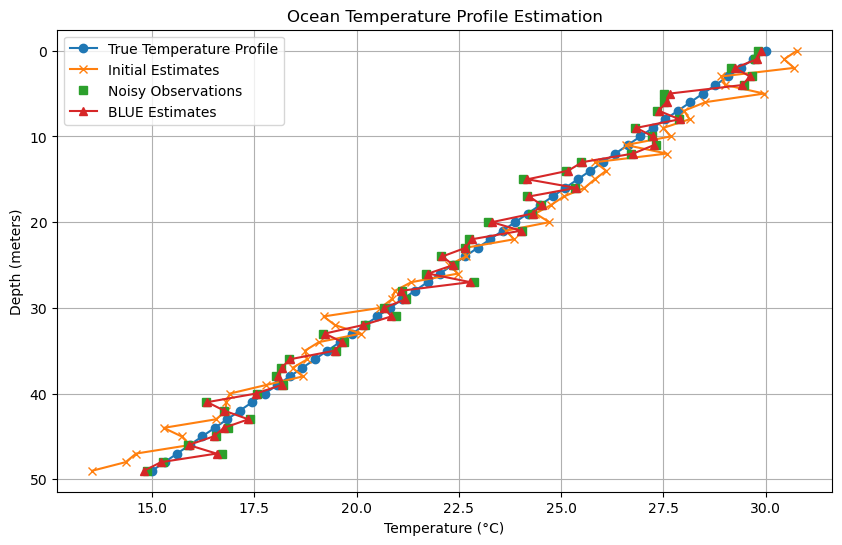

In [10]:
import matplotlib.pyplot as plt

# Define parameters
max_depth = 50  # Number of depth levels
true_temperatures = np.linspace(30, 15, max_depth)  # Linear decrease from 20°C at the surface to 5°C at the deepest point
noise_std = 0.5  # Standard deviation of the observation noise

# Generate noisy observations
observations = true_temperatures + np.random.normal(0, noise_std, max_depth)


# Initial estimates are slightly off from true temperatures
initial_state = true_temperatures - np.linspace(-1,1,max_depth) + np.random.normal(0, noise_std, max_depth)
initial_covariance = np.eye(max_depth) * 4.0  # Initial covariance, larger uncertainty

# Observation matrix (identity because we observe direct temperature at each depth)
observation_matrix = np.eye(max_depth)

# Observation covariance (assume constant error variance across all depths)
observation_covariance = np.eye(max_depth) * (noise_std ** 2)

# Perform the BLUE update
updated_state, updated_covariance = blue_update(
    initial_state, initial_covariance, observations, observation_covariance, observation_matrix
)

# Function to plot results
def plot_results(depths, true_data, initial_data, observation_data, updated_data):
    plt.figure(figsize=(10, 6))
    plt.plot(true_data, depths, label='True Temperature Profile', marker='o')
    plt.plot(initial_data, depths, label='Initial Estimates', marker='x')
    plt.plot(observation_data, depths, label='Noisy Observations', linestyle='None', marker='s')
    plt.plot(updated_data, depths, label='BLUE Estimates', marker='^')
    plt.gca().invert_yaxis()  # Invert y axis to show depth correctly
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Depth (meters)')
    plt.title('Ocean Temperature Profile Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_results(np.arange(max_depth), true_temperatures, initial_state, observations, updated_state)

## Module 5: Kalman Filter

### Overview
The Kalman Filter is a recursive solution to the linear data assimilation problem, providing a means to update estimates with new information.

### Theoretical Background
- Detail the prediction and update steps of the Kalman Filter.
- Explain how the Kalman Filter integrates model dynamics and observations.

### Mathematical Formulations
- Present the equations governing the Kalman Filter's operation, including the computation of the Kalman Gain.

### Example Problem
Demonstrate the Kalman Filter's application in a scenario with linear dynamics and Gaussian errors, showing how the state estimate evolves with each new observation.

The Kalman Filter is an efficient recursive filter that estimates the internal state of a linear dynamic system from a series of noisy measurements. It's widely used in data assimilation, particularly for systems that can be modeled as linear.

### Formal Description of the Kalman Filter
Given:
- $ x $ as the prior state estimate.
- $ P $ as the prior covariance matrix.
- $ y $ as the observation.
- $ R $ as the observation noise covariance.
- $ H $ as the observation matrix.
- $ F $ as the state transition matrix.
- $ Q $ as the process noise covariance.

The Kalman Filter operates in two steps:
1. **Predict:**
   $$ \hat{x}^- = Fx $$
   $$ P^- = FPF^T + Q $$
   
2. **Update:**
   $$ K = P^-H^T(HP^-H^T + R)^{-1} $$
   $$ \hat{x} = \hat{x}^- + K(y - H\hat{x}^-) $$
   $$ P = (I - KH)P^- $$

$x_{t+1} = x_t + \cal{N}(0,0.1)$

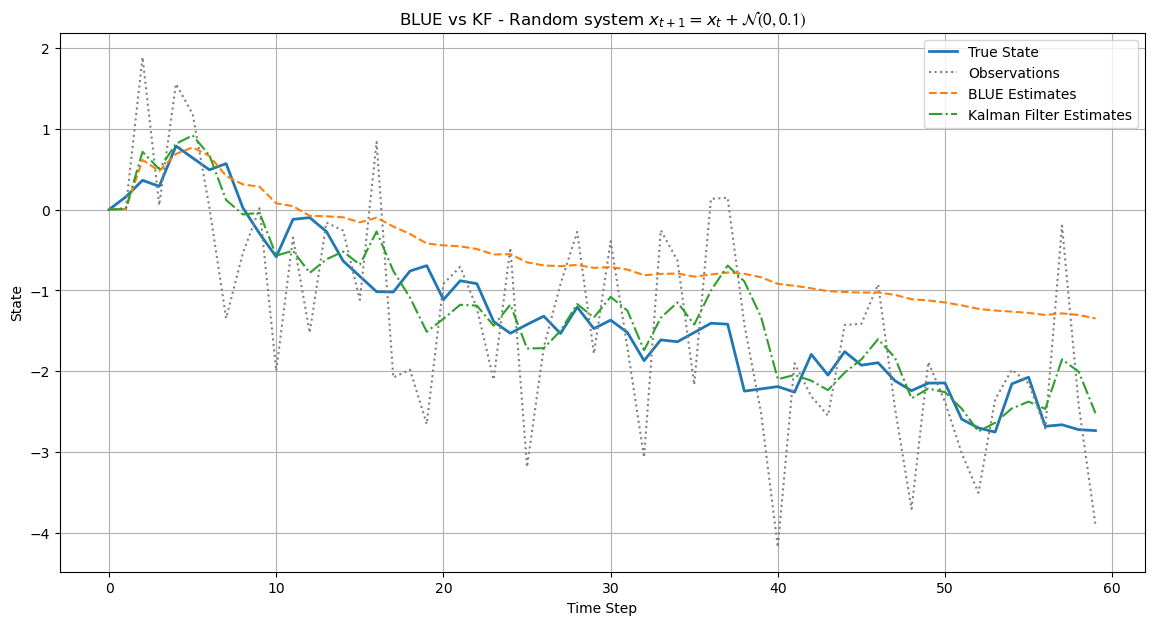

In [21]:
from DA import kf_predict, kf_update

# Parameters for the simulation
np.random.seed(42)
n_timesteps = 60  # Number of timesteps
true_state = np.zeros(n_timesteps)
noisy_observations = np.zeros(n_timesteps)
F = np.array([[1]])  # State transition matrix
H = np.array([[1]])  # Observation matrix
Q = np.array([[0.1]])  # Process noise covariance
R = np.array([[1]])  # Observation noise covariance
initial_state = np.array([0])
initial_covariance = np.array([[10]])

# Generate the true states and noisy observations
for t in range(1, n_timesteps):
    true_state[t] = (F @ true_state[t-1:t] + np.random.normal(0, np.sqrt(Q[0,0]))).item()
    noisy_observations[t] = (H @ true_state[t:t+1] + np.random.normal(0, np.sqrt(R[0,0]))).item()

# Initialize the states, covariances, and estimates arrays for each method
state_blue = initial_state.copy()
covariance_blue = initial_covariance.copy()
# state_bayesian = initial_state.copy()
# covariance_bayesian = initial_covariance.copy()
kf_state = initial_state.copy()
kf_covariance = initial_covariance.copy()
blue_estimates = np.zeros(n_timesteps)
bayesian_estimates = np.zeros(n_timesteps)
kf_estimates = np.zeros(n_timesteps)

# Apply the methods to each observation
for t in range(n_timesteps):
    # BLUE update
    state_blue, covariance_blue = blue_update(state_blue, covariance_blue, noisy_observations[t:t+1], R, H)
    blue_estimates[t] = state_blue[0]  # Access scalar value
    
    # # Bayesian Data Assimilation update
    # state_bayesian, covariance_bayesian = bayesian_data_assimilation(state_bayesian, covariance_bayesian, noisy_observations[t:t+1], R, H)
    # bayesian_estimates[t] = state_bayesian[0]  # Access scalar value
    
    # Kalman Filter predict and update
    if t > 0:
        kf_state, kf_covariance = kf_predict(kf_state, kf_covariance, F, Q)
    kf_state, kf_covariance = kf_update(kf_state, kf_covariance, noisy_observations[t:t+1], H, R)
    kf_estimates[t] = kf_state[0]  # Access scalar value

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(true_state, label='True State', linewidth=2)
plt.plot(noisy_observations, label='Observations', linestyle=':', color='gray')
plt.plot(blue_estimates, label='BLUE Estimates', linestyle='--')
# plt.plot(bayesian_estimates, label='Bayesian Estimates', linestyle='-.')
plt.plot(kf_estimates, label='Kalman Filter Estimates', linestyle='-.')
plt.title('BLUE vs KF - Random system $x_{t+1} = x_t + \cal{N}(0,0.1)$')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()

## Module 6: Extended Kalman Filter (EKF)

### Overview
The EKF extends the Kalman Filter to nonlinear systems by linearizing about the current estimate.

### Theoretical Background
- Introduce the concept of linearization used in the EKF.
- Discuss the conditions under which the EKF provides a good approximation of the true nonlinear update.

### Mathematical Formulations
- Detail the EKF equations, emphasizing the linearization process.

### Example Problem
Illustrate the EKF's application in a simple nonlinear system, showcasing the effects of linearization on estimation accuracy.

The Extended Kalman Filter (EKF) is an extension of the Kalman Filter suitable for nonlinear systems. The EKF linearizes about the current mean and covariance, typically using a first-order Taylor series expansion.

### Formal Description of the Extended Kalman Filter
Given:
- $ x $ as the prior state estimate.
- $ P $ as the prior covariance matrix.
- $ y $ as the observation.
- $ R $ as the observation noise covariance.
- Nonlinear state transition function $ f(x) $.
- Nonlinear observation function $ h(x) $.
- Jacobians $ F $ and $ H $ of $ f(x) $ and $ h(x) $ at $ x $, respectively.

The EKF operates in two steps:
1. **Predict:**
   $$ \hat{x}^- = f(x) $$
   $$ P^- = FPF^T + Q $$
   
2. **Update:**
   $$ K = P^-H^T(HP^-H^T + R)^{-1} $$ 
   $$ \hat{x} = \hat{x}^- + K(y - h(\hat{x}^-)) $$
   $$ P = (I - KH)P^- $$

In [12]:
from DA import ekf_predict, ekf_update

# Define additional nonlinear functions and their Jacobians with safeguards
def complex_transition(state):
    # Adding small value to ensure log domain validity
    return np.array([np.log(state[0] + 1 + 1e-5), state[1] ** 3])

def complex_observation(state):
    # Avoiding sqrt of negative by ensuring non-negativity
    return np.array([np.sqrt(max(state[0], 0)), state[1] + state[0]])

def complex_jacobian_F(state):
    # Avoid division by zero
    return np.array([[1 / (state[0] + 1 + 1e-5), 0], [0, 3 * state[1]**2]])

def complex_jacobian_H(state):
    # Ensure non-zero input to sqrt for Jacobian
    return np.array([[0.5 / np.sqrt(max(state[0], 1e-5)), 0], [1, 1]])

# Test parameters
test_state = np.array([0.5, 1.0])  # Adjusted initial state to be in a valid range for sqrt
test_covariance = np.array([[1, 0.1], [0.1, 1]])
test_process_noise = np.array([[0.05, 0], [0, 0.05]])
test_observation_noise = np.array([[0.05, 0], [0, 0.05]])
n_tests = 100  # Number of test iterations

# Run EKF with adjusted complex functions
for _ in range(n_tests):
    predicted_state, predicted_covariance = ekf_predict(
        test_state, test_covariance, complex_transition, complex_jacobian_F(test_state), test_process_noise)
    
    # Generate a synthetic observation based on adjusted complex observation function
    synthetic_observation = complex_observation(predicted_state) + np.random.normal(0, 0.1, size=2)
    
    updated_state, updated_covariance = ekf_update(
        predicted_state, predicted_covariance, synthetic_observation, complex_observation, complex_jacobian_H(predicted_state), test_observation_noise)
    
    # Update state and covariance for next iteration
    test_state = updated_state
    test_covariance = updated_covariance

print("Final state after tests:", updated_state)
print("Final covariance after tests:", updated_covariance)

Final state after tests: [-0.01099878 -0.01433063]
Final covariance after tests: [[ 1.99988001e-06 -9.99940008e-07]
 [-9.99940008e-07  2.50005000e-02]]


## Module 7: Ensemble Kalman Filter (EnKF)

### Overview
EnKF uses an ensemble of system states to represent the error covariance, providing a means to handle nonlinearities without

 explicit linearization.

### Theoretical Background
- Describe how the EnKF utilizes an ensemble to approximate the system's probability distribution.
- Explain the process of updating each ensemble member with observational data.

### Mathematical Formulations
- Present the formulas for updating the ensemble members and computing the ensemble mean and covariance.

### Example Problem
Propose a problem where EnKF is applied to a nonlinear system, illustrating how the ensemble captures the system's uncertainty.

The Ensemble Kalman Filter (EnKF) is a variant of the Kalman Filter that employs a Monte Carlo approach using an ensemble of forecasts to address nonlinear data assimilation issues. This method is beneficial in scenarios where the model dynamics are too complex for traditional or Extended Kalman Filters.

### Formal Description of the Ensemble Kalman Filter
Given:
- $x^a_{i-1}$ as the previous assimilated state estimate.
- $w_i$ as the process noise.
- $y$ as the observation.
- $R$ as the observation noise covariance.
- Nonlinear model dynamics function $f(x)$.
- Observation matrix $H$.

The EnKF proceeds through the following steps:
1. **Initialization:** 

   Generate an ensemble of state estimates.
2. **Forecast Step:**
   $$ x^f_i = f(x^a_{i-1}) + w_i $$
3. **Update Step:**
   $$ K = P^fH^T(HP^fH^T + R)^{-1} $$ 
   $$ x^a_i = x^f_i + K(y - Hx^f_i) $$
   where $P^f$ is the forecast covariance among the ensemble members.


C:\Users\jrm22n\AppData\Local\Temp\ipykernel_25492\3175369748.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_states[t] = nonlinear_dynamics(current_state)
C:\Users\jrm22n\AppData\Local\Temp\ipykernel_25492\3175369748.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  observations[t] = observation_function(true_states[t:t+1]) + np.random.normal(0, observation_noise_std)


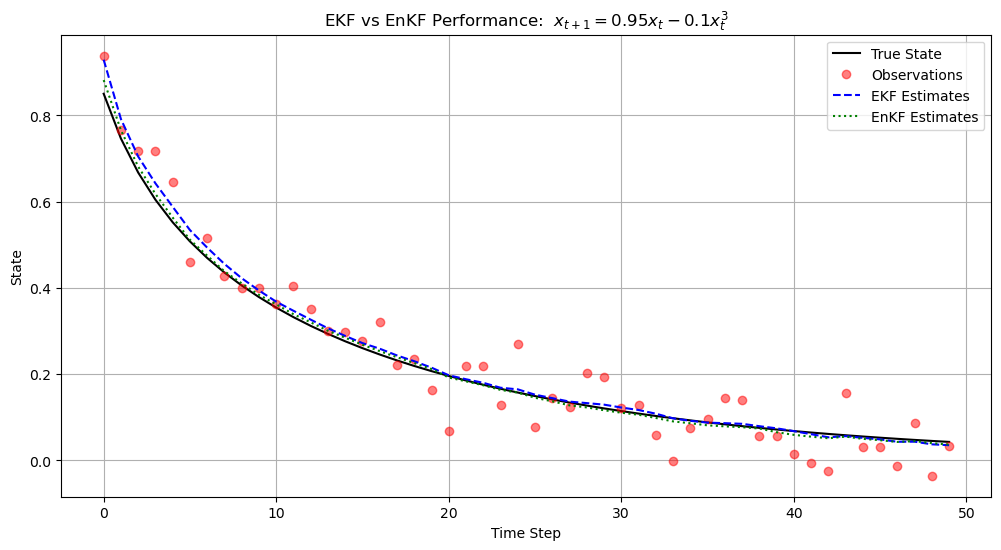

In [27]:
from DA import initialize_ensemble, forecast_ensemble, update_ensemble

# Nonlinear dynamical model and its Jacobian
def nonlinear_dynamics(state, a=0.95, b=0.1):
    return a * state - b * state**3

def jacobian_nonlinear_dynamics(state, a=0.95, b=0.1):
    return np.array([[a - 3 * b * state[0]**2]])

# Linear observation function and its Jacobian
def observation_function(state):
    return np.array([state[0]])

def jacobian_observation_function(state):
    return np.array([[1]])

# Initialize parameters
num_steps = 50
initial_state = np.array([1.0])
process_noise_std = 0.02
observation_noise_std = 0.05
observation_noise_cov = np.array([[0.05]])
ensemble_size = 100

# Generate true states and observations
true_states = np.zeros(num_steps)
observations = np.zeros(num_steps)
current_state = initial_state
np.random.seed(0)
for t in range(num_steps):
    true_states[t] = nonlinear_dynamics(current_state)
    observations[t] = observation_function(true_states[t:t+1]) + np.random.normal(0, observation_noise_std)
    current_state = true_states[t:t+1]

# Initialize EKF and EnKF
ekf_state = initial_state.copy()
ekf_covariance = np.array([[1]])
enkf_ensemble = initialize_ensemble(initial_state, np.array([[1]]), ensemble_size)

# Apply EKF and EnKF over time
ekf_estimates = np.zeros(num_steps)
enkf_estimates = np.zeros(num_steps)
for t in range(num_steps):
    # EKF predict and update
    F = jacobian_nonlinear_dynamics(ekf_state)
    predicted_state, predicted_covariance = ekf_predict(ekf_state, ekf_covariance, nonlinear_dynamics, F, np.array([[process_noise_std**2]]))
    H = jacobian_observation_function(predicted_state)
    ekf_state, ekf_covariance = ekf_update(predicted_state, predicted_covariance, observations[t:t+1], observation_function, H, observation_noise_cov)
    ekf_estimates[t] = ekf_state[0]
    
    # EnKF forecast and update
    enkf_ensemble = forecast_ensemble(enkf_ensemble, lambda x: nonlinear_dynamics(x) + np.random.normal(0, process_noise_std, size=x.shape))
    enkf_ensemble = update_ensemble(enkf_ensemble, observations[t:t+1], np.array([[1]]), observation_noise_cov)
    enkf_estimates[t] = np.mean(enkf_ensemble[:, 0])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(true_states, label='True State', linestyle='-', color='black')
plt.plot(observations, label='Observations', linestyle='none', marker='o', color='red', alpha=0.5)
plt.plot(ekf_estimates, label='EKF Estimates', linestyle='--', color='blue')
plt.plot(enkf_estimates, label='EnKF Estimates', linestyle=':', color='green')
plt.title('EKF vs EnKF Performance:  $x_{t+1} = 0.95 x_t - 0.1 x_t^3$')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()



$x_{t+1} = 0.95 x_t - 0.1 x_t^3$

## Module 8: 3D-Var

### Overview
3D-Var is a variational approach to data assimilation that finds the best estimate by minimizing a cost function.

### Theoretical Background
- Discuss the construction of the 3D-Var cost function, including the background and observation terms.
- Explain how the minimization of the cost function leads to the best estimate.

### Mathematical Formulations
- Derive the 3D-Var analysis equation by setting the gradient of the cost function to zero.

### Example Problem
Design a scenario applying 3D-Var to assimilate data, detailing the setup of the cost function and the minimization process.

The 3D Variational Data Assimilation (3DVar) method adjusts a forecast state to make it more consistent with observations by minimizing a cost function that represents the difference between the model state and observations.

The 3DVar method involves solving the following optimization problem:
$$ x_a = \text{argmin}_x J(x) $$
where $ x_a $ is the analysis state (updated state), and the cost function $ J(x) $ is defined as:
$$ J(x) = \frac{1}{2} (x - x_b)^T B^{-1} (x - x_b) + \frac{1}{2} (y - Hx)^T R^{-1} (y - Hx) $$
- $ x_a $ is the analysis state (updated state)
- $ x_b $ is the background state (prior estimate).
- $ B $ is the background error covariance matrix.
- $ y $ is the observation vector.
- $ H $ is the observation operator (linear or nonlinear) that maps the state space to the observation space.
- $ R $ is the observation error covariance matrix.

## Module 9: 4D-Var

### Overview
4D-Var extends 3D-Var by incorporating the temporal dimension, adjusting the entire trajectory of the state estimate within a time window.

### Theoretical Background
- Elaborate on the concept of trajectory optimization in 4D-Var and its advantage over 3D-Var.
- Discuss how 4D-Var integrates information across time to refine the state estimate.

### Mathematical Formulations
- Detail the 4D-Var cost function, emphasizing the inclusion of the dynamic model in the optimization process.

### Example Problem
Create an example where 4D-Var is used to correct the trajectory of a system's state over time, highlighting the impact of temporal information integration.

The Four-Dimensional Variational Data Assimilation (4DVar) method extends the 3DVar by incorporating the evolution of the state over a time window, thus accounting for changes in the state over time.

### Formal Description of 4DVar
The 4DVar method seeks to minimize the following cost function over a time window:
$$ J(x_k) = \frac{1}{2} (x_0 - x_b)^T B^{-1} (x_0 - x_b) + \frac{1}{2} \sum_{k=1}^n (y_k - H_k x_k)^T R_k^{-1} (y_k - H_k x_k) $$
where:
- $ x_0 $ is the initial state from which future states $ x_k $ are derived.
- $ x_b $ is the background state (prior estimate at the initial time).
- $ B $ is the background error covariance matrix.
- $ y_k $ are the observations at time $ k $.
- $ H_k $ are the observation operators at time $ k $.
- $ R_k $ are the observation error covariances at time $ k $.
- $ x_k $ are states predicted from $ x_0 $ using the model dynamics.

In [14]:
import numpy as np

# Define the model parameters
x_true = np.array([1.0, 2.0, 3.0])  # True state
x0 = np.array([0.5, 2.5, 3.5])  # Initial guess
y_obs = np.array([1.1, 1.9, 3.1])  # Observations

# Define the error covariances
B = np.diag([0.1, 0.1, 0.1])
R = np.diag([0.05, 0.05, 0.05])
H = np.eye(3)  # Observation operator

# Define the cost function J
def cost_function(x, x_b, y, B, R, H):
    J_b = 0.5 * np.dot((x - x_b).T, np.linalg.inv(B) @ (x - x_b))
    J_o = 0.5 * np.sum([np.dot((y[k] - H @ x).T, np.linalg.inv(R) @ (y[k] - H @ x)) for k in range(len(y))])
    return J_b + J_o

# Minimize the cost function (using a simple gradient descent for demonstration)
lr = 0.01  # Learning rate
n_iterations = 100

x = x0.copy()
for i in range(n_iterations):
    grad = (x - x0) @ np.linalg.inv(B) + H.T @ np.linalg.inv(R) @ (H @ x - y_obs)
    x -= lr * grad  # Update rule

    # Print cost every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}, Cost: {cost_function(x, x0, y_obs, B, R, H)}")

print("Optimal state estimate:", x)


Iteration 0, Cost: 182.19199999999998
Iteration 10, Cost: 145.49935572350475
Iteration 20, Cost: 144.64685215933346
Iteration 30, Cost: 144.6229178397586
Iteration 40, Cost: 144.62224187160237
Iteration 50, Cost: 144.62222277726852
Iteration 60, Cost: 144.62222223790093
Iteration 70, Cost: 144.6222222226651
Iteration 80, Cost: 144.62222222223477
Iteration 90, Cost: 144.62222222222258
Optimal state estimate: [0.9        2.1        3.23333333]


## References